In [1]:
import pandas as pd
import numpy as np
import time as t
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [2]:
dataframe_project = pd.read_csv(r'D:\College Education\Semester 5\19CSE305 Machine Learning\Project\Coding\patches_gabor_15816_1.csv')
dataframe_project

,ImageName,LocalEnergy_0_1,LocalEnergy_0_2,LocalEnergy_0_3,LocalEnergy_0.7853981633974483_1,LocalEnergy_0.7853981633974483_2,LocalEnergy_0.7853981633974483_3,LocalEnergy_1.5707963267948966_1,LocalEnergy_1.5707963267948966_2,LocalEnergy_1.5707963267948966_3,...,MeanAmplitude_0.7853981633974483_1,MeanAmplitude_0.7853981633974483_2,MeanAmplitude_0.7853981633974483_3,MeanAmplitude_1.5707963267948966_1,MeanAmplitude_1.5707963267948966_2,MeanAmplitude_1.5707963267948966_3,MeanAmplitude_2.356194490192345_1,MeanAmplitude_2.356194490192345_2,MeanAmplitude_2.356194490192345_3,class
0,MaI286_255.jpg_0_0.png,1607984,590161,30393367,30586929,30908212,3557712,1621138,652953,29941573,...,42706367,21992566,62263734,65066148,249147,40622791,42675142,21954827,62367472,good
1,MaI286_256.jpg_0_0.png,2409410,643821,28341070,27499264,28892467,3982411,2402321,644235,27960356,...,45782802,23562865,61063851,64309685,252989,43541072,45761590,23541111,61161404,good
2,MaI286_256.jpg_0_2.png,1244326,369812,30907068,27466105,28429032,2831793,1252555,602900,30921587,...,45316007,23315932,63392361,65690131,257766,43109193,45296517,23293852,63474181,good
3,MaI286_256.jpg_0_3.png,1631795,557097,30301489,29490085,29306020,4807170,1644043,1057676,29838689,...,41933519,21616534,60989696,65434755,472186,40035467,41888839,21567725,61148415,good
4,MaI286_258.jpg_0_0.png,984212,433434,29948438,30600901,31128474,2724761,979870,374437,30769862,...,43313769,22282942,63965827,66146550,137173,41167720,43298158,22265049,64010694,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4305,MaI843_047_0_0.png,1148726,301551,24516974,27216360,30997331,8563063,1133933,291160,24664964,...,36116804,18562491,61832379,65723007,65218,34301160,36116430,18561987,61803126,bad
4306,MaI843_048_0_1.png,645854,234329,29333027,29946293,31494284,6389616,634937,464582,29331611,...,40270695,20714888,62239700,66517727,119120,38264591,40266947,20706356,62337197,bad
4307,MaI843_048_0_0.png,3120475,666772,29133067,29819972,30353781,5961931,3086075,357274,29495865,...,38812330,19959629,59041573,62365063,74478,36842285,38809960,19953819,59094463,bad
4308,MaI843_047_0_8.png,1277520,612085,24686619,27101002,30589675,10843015,1271576,646650,25356419,...,35144094,18084309,60155871,66228896,176590,33418317,35146446,18088530,60149050,bad


In [3]:
from sklearn import preprocessing as prep
label_encoder = prep.LabelEncoder()
dataframe_project['class'] = label_encoder.fit_transform(dataframe_project['class'])
dataframe_project

,ImageName,LocalEnergy_0_1,LocalEnergy_0_2,LocalEnergy_0_3,LocalEnergy_0.7853981633974483_1,LocalEnergy_0.7853981633974483_2,LocalEnergy_0.7853981633974483_3,LocalEnergy_1.5707963267948966_1,LocalEnergy_1.5707963267948966_2,LocalEnergy_1.5707963267948966_3,...,MeanAmplitude_0.7853981633974483_1,MeanAmplitude_0.7853981633974483_2,MeanAmplitude_0.7853981633974483_3,MeanAmplitude_1.5707963267948966_1,MeanAmplitude_1.5707963267948966_2,MeanAmplitude_1.5707963267948966_3,MeanAmplitude_2.356194490192345_1,MeanAmplitude_2.356194490192345_2,MeanAmplitude_2.356194490192345_3,class
0,MaI286_255.jpg_0_0.png,1607984,590161,30393367,30586929,30908212,3557712,1621138,652953,29941573,...,42706367,21992566,62263734,65066148,249147,40622791,42675142,21954827,62367472,1
1,MaI286_256.jpg_0_0.png,2409410,643821,28341070,27499264,28892467,3982411,2402321,644235,27960356,...,45782802,23562865,61063851,64309685,252989,43541072,45761590,23541111,61161404,1
2,MaI286_256.jpg_0_2.png,1244326,369812,30907068,27466105,28429032,2831793,1252555,602900,30921587,...,45316007,23315932,63392361,65690131,257766,43109193,45296517,23293852,63474181,1
3,MaI286_256.jpg_0_3.png,1631795,557097,30301489,29490085,29306020,4807170,1644043,1057676,29838689,...,41933519,21616534,60989696,65434755,472186,40035467,41888839,21567725,61148415,1
4,MaI286_258.jpg_0_0.png,984212,433434,29948438,30600901,31128474,2724761,979870,374437,30769862,...,43313769,22282942,63965827,66146550,137173,41167720,43298158,22265049,64010694,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4305,MaI843_047_0_0.png,1148726,301551,24516974,27216360,30997331,8563063,1133933,291160,24664964,...,36116804,18562491,61832379,65723007,65218,34301160,36116430,18561987,61803126,0
4306,MaI843_048_0_1.png,645854,234329,29333027,29946293,31494284,6389616,634937,464582,29331611,...,40270695,20714888,62239700,66517727,119120,38264591,40266947,20706356,62337197,0
4307,MaI843_048_0_0.png,3120475,666772,29133067,29819972,30353781,5961931,3086075,357274,29495865,...,38812330,19959629,59041573,62365063,74478,36842285,38809960,19953819,59094463,0
4308,MaI843_047_0_8.png,1277520,612085,24686619,27101002,30589675,10843015,1271576,646650,25356419,...,35144094,18084309,60155871,66228896,176590,33418317,35146446,18088530,60149050,0


In [4]:
normal_scaler = prep.StandardScaler()
scaled_columns = dataframe_project.columns[1:25]
scaled_df = dataframe_project
for col in scaled_columns:
    scaled_df[col] = normal_scaler.fit_transform(scaled_df[col].values.reshape(-1, 1))
scaled_df

,ImageName,LocalEnergy_0_1,LocalEnergy_0_2,LocalEnergy_0_3,LocalEnergy_0.7853981633974483_1,LocalEnergy_0.7853981633974483_2,LocalEnergy_0.7853981633974483_3,LocalEnergy_1.5707963267948966_1,LocalEnergy_1.5707963267948966_2,LocalEnergy_1.5707963267948966_3,...,MeanAmplitude_0.7853981633974483_1,MeanAmplitude_0.7853981633974483_2,MeanAmplitude_0.7853981633974483_3,MeanAmplitude_1.5707963267948966_1,MeanAmplitude_1.5707963267948966_2,MeanAmplitude_1.5707963267948966_3,MeanAmplitude_2.356194490192345_1,MeanAmplitude_2.356194490192345_2,MeanAmplitude_2.356194490192345_3,class
0,MaI286_255.jpg_0_0.png,0.206364,1.137685,1.050212,0.961044,0.666561,-0.787215,0.215413,1.248537,0.990115,...,1.077631,1.082246,0.726466,0.556098,1.807526,1.081326,1.075729,1.077680,0.730857,1
1,MaI286_256.jpg_0_0.png,0.817664,1.323767,0.853097,0.674644,0.497735,-0.743263,0.810270,1.219416,0.800269,...,1.286252,1.289359,0.676086,0.527098,1.847232,1.289622,1.285047,1.286934,0.680215,1
2,MaI286_256.jpg_0_2.png,-0.071022,0.373560,1.099551,0.671568,0.458921,-0.862340,-0.065256,1.081344,1.084022,...,1.254597,1.256790,0.773855,0.580019,1.896600,1.258796,1.253507,1.254317,0.777327,1
3,MaI286_256.jpg_0_3.png,0.224526,1.023026,1.041387,0.859305,0.532372,-0.657909,0.232855,2.600439,0.980256,...,1.025223,1.032650,0.672973,0.570229,4.112539,1.039405,1.022403,1.026616,0.679669,1
4,MaI286_258.jpg_0_0.png,-0.269428,0.594188,1.007478,0.962340,0.685009,-0.873417,-0.272901,0.318206,1.069484,...,1.118821,1.120545,0.797933,0.597516,0.650323,1.120221,1.117981,1.118603,0.799854,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4305,MaI843_047_0_0.png,-0.143943,0.136845,0.485807,0.648403,0.674025,-0.269214,-0.155585,0.040035,0.484496,...,0.630777,0.629839,0.708355,0.581279,-0.093301,0.630111,0.630928,0.630116,0.707160,0
4306,MaI843_048_0_1.png,-0.527516,-0.096267,0.948370,0.901621,0.715647,-0.494143,-0.535561,0.619319,0.931666,...,0.912462,0.913728,0.725457,0.611745,0.463753,0.913006,0.912409,0.912989,0.729585,0
4307,MaI843_048_0_0.png,1.360040,1.403357,0.929165,0.889904,0.620126,-0.538403,1.330936,0.260876,0.947406,...,0.813567,0.814113,0.591175,0.452550,0.002397,0.811487,0.813599,0.813718,0.593426,0
4308,MaI843_047_0_8.png,-0.045703,1.213713,0.502100,0.637703,0.639883,-0.033262,-0.050772,1.227483,0.550753,...,0.564815,0.566770,0.637962,0.600673,1.057681,0.567096,0.565145,0.567660,0.637707,0


In [5]:
dataframe_scaled_input = scaled_df.iloc[:, 1:25]
dataframe_scaled_output = scaled_df.iloc[:, 25]
scaled_input_train, scaled_input_test, scaled_output_train, scaled_output_test = train_test_split(dataframe_scaled_input, dataframe_scaled_output, test_size=0.3, random_state=42)

In [6]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
input_train_res, output_train_res = sm.fit_resample(scaled_input_train, scaled_output_train.ravel())

In [7]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colName=corr_matrix.columns[i]
                col_corr.add(colName)
    return col_corr
col=correlation(input_train_res,0.95)
print('Correlated columns:',col)
print(len(col))

Correlated columns: {'MeanAmplitude_0_3', 'LocalEnergy_1.5707963267948966_3', 'MeanAmplitude_1.5707963267948966_2', 'LocalEnergy_2.356194490192345_2', 'MeanAmplitude_2.356194490192345_1', 'LocalEnergy_2.356194490192345_1', 'MeanAmplitude_0_2', 'MeanAmplitude_0_1', 'MeanAmplitude_0.7853981633974483_3', 'MeanAmplitude_1.5707963267948966_3', 'MeanAmplitude_2.356194490192345_2', 'MeanAmplitude_2.356194490192345_3', 'LocalEnergy_0.7853981633974483_1', 'LocalEnergy_2.356194490192345_3', 'LocalEnergy_1.5707963267948966_1', 'MeanAmplitude_1.5707963267948966_1', 'MeanAmplitude_0.7853981633974483_1', 'MeanAmplitude_0.7853981633974483_2', 'LocalEnergy_0.7853981633974483_2'}
19


In [8]:
dataframe_reduced = dataframe_project.drop(columns = ['LocalEnergy_1.5707963267948966_1', 'MeanAmplitude_0_3', 'MeanAmplitude_2.356194490192345_3', 'LocalEnergy_0.7853981633974483_2', 'LocalEnergy_1.5707963267948966_3', 'MeanAmplitude_0.7853981633974483_3', 'MeanAmplitude_0_1', 'MeanAmplitude_0.7853981633974483_2', 'LocalEnergy_2.356194490192345_1', 'MeanAmplitude_1.5707963267948966_3', 'MeanAmplitude_1.5707963267948966_2', 'MeanAmplitude_1.5707963267948966_1', 'MeanAmplitude_2.356194490192345_2', 'MeanAmplitude_0_2', 'MeanAmplitude_2.356194490192345_1', 'LocalEnergy_2.356194490192345_2', 'LocalEnergy_2.356194490192345_3', 'MeanAmplitude_0.7853981633974483_1'])
dataframe_reduced

,ImageName,LocalEnergy_0_1,LocalEnergy_0_2,LocalEnergy_0_3,LocalEnergy_0.7853981633974483_1,LocalEnergy_0.7853981633974483_3,LocalEnergy_1.5707963267948966_2,class
0,MaI286_255.jpg_0_0.png,0.206364,1.137685,1.050212,0.961044,-0.787215,1.248537,1
1,MaI286_256.jpg_0_0.png,0.817664,1.323767,0.853097,0.674644,-0.743263,1.219416,1
2,MaI286_256.jpg_0_2.png,-0.071022,0.373560,1.099551,0.671568,-0.862340,1.081344,1
3,MaI286_256.jpg_0_3.png,0.224526,1.023026,1.041387,0.859305,-0.657909,2.600439,1
4,MaI286_258.jpg_0_0.png,-0.269428,0.594188,1.007478,0.962340,-0.873417,0.318206,1
...,...,...,...,...,...,...,...,...
4305,MaI843_047_0_0.png,-0.143943,0.136845,0.485807,0.648403,-0.269214,0.040035,0
4306,MaI843_048_0_1.png,-0.527516,-0.096267,0.948370,0.901621,-0.494143,0.619319,0
4307,MaI843_048_0_0.png,1.360040,1.403357,0.929165,0.889904,-0.538403,0.260876,0
4308,MaI843_047_0_8.png,-0.045703,1.213713,0.502100,0.637703,-0.033262,1.227483,0


In [9]:
dataframe_scaled_input = dataframe_reduced.iloc[:, 1:7]
dataframe_scaled_output = dataframe_reduced.iloc[:, 7]
scaled_input_train, scaled_input_test, scaled_output_train, scaled_output_test = train_test_split(dataframe_scaled_input, dataframe_scaled_output, test_size=0.3, random_state=42)

In [10]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
input_train_res, output_train_res = sm.fit_resample(scaled_input_train, scaled_output_train.ravel())
print(output_train_res)

[0 1 0 ... 2 2 2]


<Axes: >

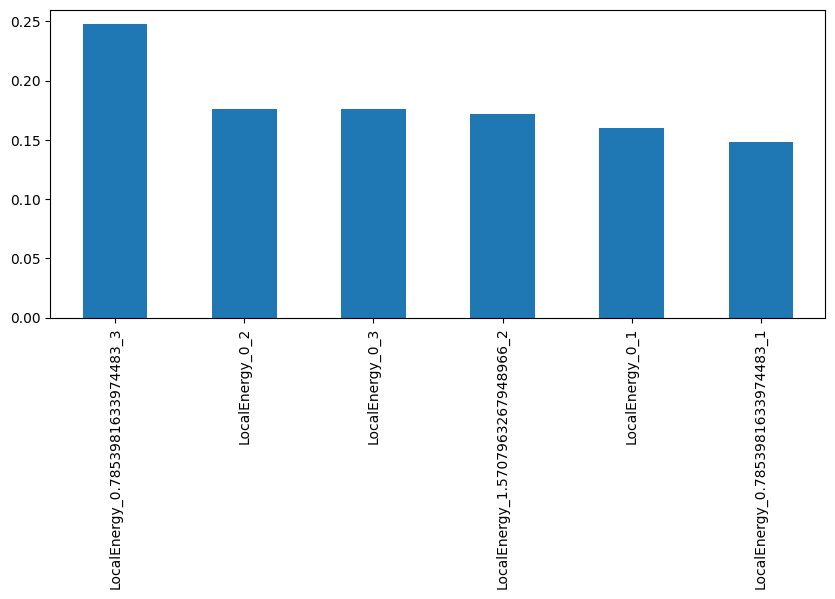

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif

mi1 = mutual_info_classif(input_train_res, output_train_res)
mi1 = pd.Series(mi1)
mi1.index = input_train_res.columns
mi1.sort_values(ascending=False)
mi1.sort_values(ascending=False).plot.bar(figsize=(10, 4))
mi1_sorted = mi1.sort_values(ascending=False)

# Plot the sorted values only if the value is greater than 0
mi1_sorted[mi1_sorted > 0].plot.bar(figsize=(10, 4))

In [12]:
dataframe_final = dataframe_reduced.drop(columns=['LocalEnergy_0.7853981633974483_1'])
dataframe_final

,ImageName,LocalEnergy_0_1,LocalEnergy_0_2,LocalEnergy_0_3,LocalEnergy_0.7853981633974483_3,LocalEnergy_1.5707963267948966_2,class
0,MaI286_255.jpg_0_0.png,0.206364,1.137685,1.050212,-0.787215,1.248537,1
1,MaI286_256.jpg_0_0.png,0.817664,1.323767,0.853097,-0.743263,1.219416,1
2,MaI286_256.jpg_0_2.png,-0.071022,0.373560,1.099551,-0.862340,1.081344,1
3,MaI286_256.jpg_0_3.png,0.224526,1.023026,1.041387,-0.657909,2.600439,1
4,MaI286_258.jpg_0_0.png,-0.269428,0.594188,1.007478,-0.873417,0.318206,1
...,...,...,...,...,...,...,...
4305,MaI843_047_0_0.png,-0.143943,0.136845,0.485807,-0.269214,0.040035,0
4306,MaI843_048_0_1.png,-0.527516,-0.096267,0.948370,-0.494143,0.619319,0
4307,MaI843_048_0_0.png,1.360040,1.403357,0.929165,-0.538403,0.260876,0
4308,MaI843_047_0_8.png,-0.045703,1.213713,0.502100,-0.033262,1.227483,0


In [13]:
input_final = dataframe_final.iloc[:, 1:6]
output_final = dataframe_final.iloc[:, 6]
final_input_train, final_input_test, final_output_train, final_output_test = train_test_split(input_final, output_final, test_size=0.3, random_state=42)

In [14]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
input_train_res, output_train_res = sm.fit_resample(final_input_train, final_output_train.ravel())

In [15]:
# Project data classification rules
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
k_range = list(range(1, 21))
param_grid = dict(n_neighbors=k_range)

scores_knn = cross_val_score(knn_model, input_final.values, output_final.values, cv = 10)
start_train_knn = t.time()
grid_search_knn = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy', return_train_score=False,verbose=1)
grid_search_knn.fit(input_train_res, output_train_res)
end_train_knn = t.time()
training_time_knn = end_train_knn - start_train_knn
predicted_knn_train = grid_search_knn.predict(input_train_res.values)

start_test_knn = t.time()
predicted_knn_test = grid_search_knn.predict(final_input_test.values)
end_test_knn = t.time()
testing_time_knn = end_test_knn - start_test_knn

Fitting 5 folds for each of 20 candidates, totalling 100 fits


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [16]:
print("Training data")
print(classification_report(output_train_res, predicted_knn_train))
print("Accuracy: ", accuracy_score(output_train_res, predicted_knn_train))
print("Precision: ", precision_score(output_train_res, predicted_knn_train, average='weighted'))
print("Recall: ", recall_score(output_train_res, predicted_knn_train, average='weighted'))
print("F1-score: ", f1_score(output_train_res, predicted_knn_train, average='weighted'))
print(training_time_knn, 's')
print("Testing data")
print(classification_report(final_output_test, predicted_knn_test))
print("Accuracy: ", accuracy_score(final_output_test, predicted_knn_test))
print("Precision: ", precision_score(final_output_test, predicted_knn_test, average='weighted'))
print("Recall: ", recall_score(final_output_test, predicted_knn_test, average='weighted'))
print("F1-score: ", f1_score(final_output_test, predicted_knn_test, average='weighted'))
print(testing_time_knn, 's')
print(grid_search_knn.best_params_)
print("Mean Accuracy: ",scores_knn.mean())
print("Standard Deviation: ",scores_knn.std())

Training data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1442
           1       1.00      1.00      1.00      1442
           2       1.00      1.00      1.00      1442

    accuracy                           1.00      4326
   macro avg       1.00      1.00      1.00      4326
weighted avg       1.00      1.00      1.00      4326

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1-score:  1.0
4.799453973770142 s
Testing data
              precision    recall  f1-score   support

           0       0.71      0.71      0.71       449
           1       0.76      0.71      0.74       621
           2       0.44      0.52      0.47       223

    accuracy                           0.68      1293
   macro avg       0.64      0.65      0.64      1293
weighted avg       0.69      0.68      0.68      1293

Accuracy:  0.6782675947409126
Precision:  0.6884663056515695
Recall:  0.6782675947409126
F1-score:  0.6823525496723485
0.07636809349

In [17]:
# Logistic Regression
from sklearn.linear_model import LogisticRegressionCV
log_regre_model = LogisticRegressionCV()
scores_log_regre = cross_val_score(log_regre_model, input_final.values, output_final.values, cv=10)
start_train_log_regre = t.time()
grid_search_log_regre = GridSearchCV(log_regre_model, param_grid={
'solver': ['lbfs', 'liblinear', 'sag', 'saga']
}, cv=5)
grid_search_log_regre.fit(input_train_res, output_train_res)
end_train_log_regre = t.time()
training_time_log_regre = end_train_log_regre - start_train_log_regre
predicted_log_regre_train = grid_search_log_regre.predict(input_train_res.values)
start_test_log_regre = t.time()
predicted_log_regre_test = grid_search_log_regre.predict(final_input_test.values)
end_test_log_regre = t.time()
testing_time_log_regre = end_test_log_regre - start_test_log_regre

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.

In [18]:
print("Training data")
print(classification_report(output_train_res, predicted_log_regre_train))
print("Accuracy: ", accuracy_score(output_train_res, predicted_log_regre_train))
print("Precision: ", precision_score(output_train_res, predicted_log_regre_train, average='weighted'))
print("Recall: ", recall_score(output_train_res, predicted_log_regre_train, average='weighted'))
print("F1-score: ", f1_score(output_train_res, predicted_log_regre_train, average='weighted'))
print(training_time_log_regre, 's')
print("Testing data")
print(classification_report(final_output_test, predicted_log_regre_test))
print("Accuracy: ", accuracy_score(final_output_test, predicted_log_regre_test))
print("Precision: ", precision_score(final_output_test, predicted_log_regre_test, average='weighted'))
print("Recall: ", recall_score(final_output_test, predicted_log_regre_test, average='weighted'))
print("F1-score: ", f1_score(final_output_test, predicted_log_regre_test, average='weighted'))
print(testing_time_log_regre, 's')
print(grid_search_log_regre.best_params_)
print("Mean Accuracy: ",scores_log_regre.mean())
print("Standard Deviation: ",scores_log_regre.std())

Training data
              precision    recall  f1-score   support

           0       0.54      0.62      0.58      1442
           1       0.49      0.67      0.56      1442
           2       0.47      0.24      0.31      1442

    accuracy                           0.51      4326
   macro avg       0.50      0.51      0.48      4326
weighted avg       0.50      0.51      0.48      4326

Accuracy:  0.505085529357374
Precision:  0.49986817930813005
Recall:  0.505085529357374
F1-score:  0.4840939261883641
5.478723049163818 s
Testing data
              precision    recall  f1-score   support

           0       0.62      0.65      0.64       449
           1       0.67      0.68      0.68       621
           2       0.28      0.24      0.26       223

    accuracy                           0.60      1293
   macro avg       0.52      0.53      0.52      1293
weighted avg       0.59      0.60      0.59      1293

Accuracy:  0.5955143078112916
Precision:  0.5879283742080834
Recall:  0.5

In [19]:
# Multi Layer Perceptron
# Project data classification rules
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier()
scores_mlp = cross_val_score(mlp_model, input_final.values, output_final.values, cv=10)
start_train_mlp = t.time()
grid_search_mlp = GridSearchCV(estimator=MLPClassifier(), param_grid={
'learning_rate': ["constant"],
'hidden_layer_sizes': [(100,3)],
'alpha': [0.8],
'solver': ['lbfgs', 'sgd', 'adam'],
'activation': ['identity', 'logistic', 'tanh', 'relu']
}, cv=5)
grid_search_mlp.fit(input_train_res, output_train_res)
end_train_mlp = t.time()
training_time_mlp = end_train_mlp - start_train_mlp
predicted_mlp_train = grid_search_mlp.predict(input_train_res.values)
start_test_mlp = t.time()
predicted_mlp_test = grid_search_mlp.predict(final_input_test.values)
end_test_mlp = t.time()
testing_time_mlp = end_test_mlp - start_test_mlp

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the 

In [20]:
print("Training data")
print(classification_report(output_train_res, predicted_mlp_train))
print("Accuracy: ", accuracy_score(output_train_res, predicted_mlp_train))
print("Precision: ", precision_score(output_train_res, predicted_mlp_train, average='weighted'))
print("Recall: ", recall_score(output_train_res, predicted_mlp_train, average='weighted'))
print("F1-score: ", f1_score(output_train_res, predicted_mlp_train, average='weighted'))
print(training_time_mlp, 's')
print("Testing data")
print(classification_report(final_output_test, predicted_mlp_test))
print("Accuracy: ", accuracy_score(final_output_test, predicted_mlp_test))
print("Precision: ", precision_score(final_output_test, predicted_mlp_test, average='weighted'))
print("Recall: ", recall_score(final_output_test, predicted_mlp_test, average='weighted'))
print("F1-score: ", f1_score(final_output_test, predicted_mlp_test, average='weighted'))
print(testing_time_mlp, 's')
print(grid_search_mlp.best_params_)
print("Mean Accuracy: ",scores_mlp.mean())
print("Standard Deviation: ",scores_mlp.std())

Training data
              precision    recall  f1-score   support

           0       0.74      0.73      0.73      1442
           1       0.64      0.87      0.73      1442
           2       0.71      0.46      0.56      1442

    accuracy                           0.68      4326
   macro avg       0.69      0.68      0.67      4326
weighted avg       0.69      0.68      0.67      4326

Accuracy:  0.6846971798428109
Precision:  0.6930415252761607
Recall:  0.6846971798428109
F1-score:  0.674381724846874
121.35773515701294 s
Testing data
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       449
           1       0.77      0.86      0.81       621
           2       0.53      0.39      0.45       223

    accuracy                           0.74      1293
   macro avg       0.69      0.66      0.67      1293
weighted avg       0.73      0.74      0.73      1293

Accuracy:  0.7378190255220418
Precision:  0.726929755874866
Recall:  0.7

In [21]:
sm = SMOTE(random_state=2)
input_total_res, output_total_res = sm.fit_resample(input_final, output_final.ravel())

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\

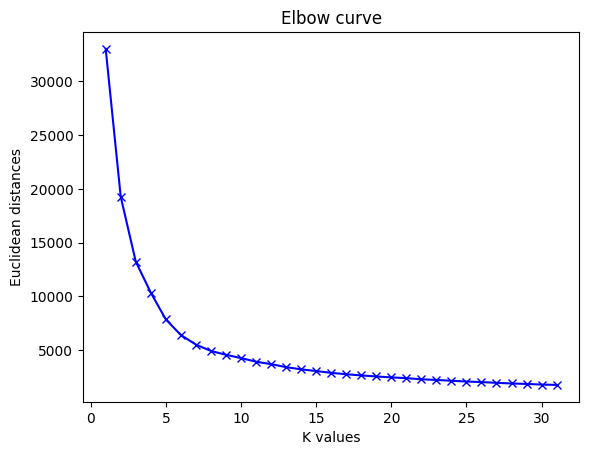

In [22]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
model_k_means = KMeans()
k_values = range(1, 32)
euclidean_distances = []
for k in k_values:
    k_means_model = KMeans(n_clusters=k)
    k_means_model.fit(input_total_res)
    euclidean_distances.append(k_means_model.inertia_)
plt.plot(k_values, euclidean_distances, 'bx-')
plt.xlabel('K values')
plt.ylabel('Euclidean distances')
plt.title('Elbow curve')
plt.show()

In [23]:
start_train_k_means = t.time()
grid_search_k_means = GridSearchCV(model_k_means, param_grid= {'n_clusters': [2, 3, 4, 5, 6]})
grid_search_k_means.fit(input_total_res)
end_train_k_means = t.time()
training_time_k_means = end_train_k_means - start_train_k_means
predicted_k_means_train = grid_search_k_means.predict(input_total_res)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\

In [24]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import adjusted_rand_score
print("Training data")
print('Silhouette score: ', silhouette_score(output_total_res.reshape(-1, 1), predicted_k_means_train.reshape(-1 , 1)))
print('DB index: ', davies_bouldin_score(output_total_res.reshape(-1, 1), predicted_k_means_train.reshape(-1 , 1)))
print('ARI score: ', adjusted_rand_score(output_total_res, predicted_k_means_train))
print('Computational time: ', training_time_k_means, 's')
print(grid_search_k_means.best_params_)

Training data


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette score:  -0.1344145765118307
DB index:  22.279738331350373
ARI score:  0.0957900683075892
Computational time:  1.6915042400360107 s
{'n_clusters': 6}


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from itertools import product
param_grid = {
    'n_clusters': [2, 3, 4, 5],
    'linkage': [ 'complete', 'average', 'single'],
    'affinity': ['euclidean', 'manhattan', 'cosine']
}
start_train_agglo = t.time()
best_score_agglo = -1
best_params_agglo = {} 
for params in product(*param_grid.values()):
    param_dict = dict(zip(param_grid.keys(), params))
    agg_cluster = AgglomerativeClustering(**param_dict)
    labels = agg_cluster.fit_predict(input_total_res)
    score = silhouette_score(output_total_res.reshape(-1, 1), labels)
    print(f"Parameters: {param_dict}, Silhouette Score: {score}")
    if score > best_score_agglo:
        best_score_agglo = score
        best_params_agglo = param_dict

best_agg_cluster = AgglomerativeClustering(**best_params_agglo)
labels = best_agg_cluster.fit_predict(input_total_res)
end_train_agglo = t.time()
adjusted_rand_score_agglo = adjusted_rand_score(output_total_res, labels)
training_time_agglomerative = end_train_agglo - start_train_agglo

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 2, 'linkage': 'complete', 'affinity': 'euclidean'}, Silhouette Score: 0.10506697253974029


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 2, 'linkage': 'complete', 'affinity': 'manhattan'}, Silhouette Score: 0.09647397868778525


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 2, 'linkage': 'complete', 'affinity': 'cosine'}, Silhouette Score: 0.0013495914767653867


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 2, 'linkage': 'average', 'affinity': 'euclidean'}, Silhouette Score: -0.054514235168061705


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 2, 'linkage': 'average', 'affinity': 'manhattan'}, Silhouette Score: 0.10506697253974029


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 2, 'linkage': 'average', 'affinity': 'cosine'}, Silhouette Score: 0.059366655782360354


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 2, 'linkage': 'single', 'affinity': 'euclidean'}, Silhouette Score: -0.054514235168061705


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 2, 'linkage': 'single', 'affinity': 'manhattan'}, Silhouette Score: -0.054514235168061705


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 2, 'linkage': 'single', 'affinity': 'cosine'}, Silhouette Score: 0.16518653106228048


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 3, 'linkage': 'complete', 'affinity': 'euclidean'}, Silhouette Score: 0.07867854317838868


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 3, 'linkage': 'complete', 'affinity': 'manhattan'}, Silhouette Score: -0.1765761805673118


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 3, 'linkage': 'complete', 'affinity': 'cosine'}, Silhouette Score: -0.02339717793918969


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 3, 'linkage': 'average', 'affinity': 'euclidean'}, Silhouette Score: -0.21857679686400497


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 3, 'linkage': 'average', 'affinity': 'manhattan'}, Silhouette Score: -0.0004631939162543189


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 3, 'linkage': 'average', 'affinity': 'cosine'}, Silhouette Score: -0.05861773035935308


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 3, 'linkage': 'single', 'affinity': 'euclidean'}, Silhouette Score: -0.05499896614237096


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 3, 'linkage': 'single', 'affinity': 'manhattan'}, Silhouette Score: -0.05499896614237096


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 3, 'linkage': 'single', 'affinity': 'cosine'}, Silhouette Score: -0.19627255349477768


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 4, 'linkage': 'complete', 'affinity': 'euclidean'}, Silhouette Score: -0.28431366813290926


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 4, 'linkage': 'complete', 'affinity': 'manhattan'}, Silhouette Score: -0.3677515400854313


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 4, 'linkage': 'complete', 'affinity': 'cosine'}, Silhouette Score: -0.1639795334477341


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 4, 'linkage': 'average', 'affinity': 'euclidean'}, Silhouette Score: -0.2943701319964131


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 4, 'linkage': 'average', 'affinity': 'manhattan'}, Silhouette Score: -0.4328942097858282


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 4, 'linkage': 'average', 'affinity': 'cosine'}, Silhouette Score: -0.08441988660601746


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 4, 'linkage': 'single', 'affinity': 'euclidean'}, Silhouette Score: -0.38791038654073334


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 4, 'linkage': 'single', 'affinity': 'manhattan'}, Silhouette Score: -0.38791038654073334


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 4, 'linkage': 'single', 'affinity': 'cosine'}, Silhouette Score: -0.6773845866689955


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 5, 'linkage': 'complete', 'affinity': 'euclidean'}, Silhouette Score: -0.4249642236879867


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 5, 'linkage': 'complete', 'affinity': 'manhattan'}, Silhouette Score: -0.4878555504733233


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 5, 'linkage': 'complete', 'affinity': 'cosine'}, Silhouette Score: -0.22397635161288412


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 5, 'linkage': 'average', 'affinity': 'euclidean'}, Silhouette Score: -0.39121422709811576


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 5, 'linkage': 'average', 'affinity': 'manhattan'}, Silhouette Score: -0.4369880883078772


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 5, 'linkage': 'average', 'affinity': 'cosine'}, Silhouette Score: -0.14203413455823954


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 5, 'linkage': 'single', 'affinity': 'euclidean'}, Silhouette Score: -0.3868778929235195


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 5, 'linkage': 'single', 'affinity': 'manhattan'}, Silhouette Score: -0.3868778929235195


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Parameters: {'n_clusters': 5, 'linkage': 'single', 'affinity': 'cosine'}, Silhouette Score: -0.6777077406518682


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [26]:
print("\nBest Parameters: ", best_params_agglo)
print("Best Silhouette Score: ", best_score_agglo)
print('Best adjusted rand score: ', adjusted_rand_score_agglo)
print('Computational time: ', training_time_agglomerative, 's')


Best Parameters:  {'n_clusters': 2, 'linkage': 'single', 'affinity': 'cosine'}
Best Silhouette Score:  0.16518653106228048
Best adjusted rand score:  0.09253972164623804
Computational time:  50.571367502212524 s


In [27]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from itertools import product
param_grid = {
    'min_samples': [2, 3, 4, 5, 6, 7],
    'metric': ['euclidean', 'l1', 'l2', 'manhattan'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
start_train_dbscan = t.time()
best_score_dbscan = -1
best_params_dbscan = {}
for params in product(*param_grid.values()):
    param_dict = dict(zip(param_grid.keys(), params))
    dbscan_cluster = DBSCAN(**param_dict)
    labels = dbscan_cluster.fit_predict(input_total_res)
    score = silhouette_score(output_total_res.reshape(-1, 1), labels)
    print(f"Parameters: {param_dict}, Silhouette Score: {score}")
    if score > best_score_dbscan:
        best_score_dbscan = score
        best_params_dbscan = param_dict

best_dbscan_cluster = DBSCAN(**best_params_dbscan)
labels = best_dbscan_cluster.fit_predict(input_total_res)
end_train_dbscan = t.time()
adjusted_rand_score_dbscan = adjusted_rand_score(output_total_res, labels)
training_time_dbscan = end_train_dbscan - start_train_dbscan

Parameters: {'min_samples': 2, 'metric': 'euclidean', 'algorithm': 'auto'}, Silhouette Score: -0.9894974955566327
Parameters: {'min_samples': 2, 'metric': 'euclidean', 'algorithm': 'ball_tree'}, Silhouette Score: -0.9894974955566327
Parameters: {'min_samples': 2, 'metric': 'euclidean', 'algorithm': 'kd_tree'}, Silhouette Score: -0.9894974955566327
Parameters: {'min_samples': 2, 'metric': 'euclidean', 'algorithm': 'brute'}, Silhouette Score: -0.9894974955566327
Parameters: {'min_samples': 2, 'metric': 'l1', 'algorithm': 'auto'}, Silhouette Score: -0.935692357408305
Parameters: {'min_samples': 2, 'metric': 'l1', 'algorithm': 'ball_tree'}, Silhouette Score: -0.935692357408305
Parameters: {'min_samples': 2, 'metric': 'l1', 'algorithm': 'kd_tree'}, Silhouette Score: -0.935692357408305
Parameters: {'min_samples': 2, 'metric': 'l1', 'algorithm': 'brute'}, Silhouette Score: -0.935692357408305
Parameters: {'min_samples': 2, 'metric': 'l2', 'algorithm': 'auto'}, Silhouette Score: -0.989497495556

In [28]:
print("\nBest Parameters: ", best_params_dbscan)
print("Best Silhouette Score: ", best_score_dbscan)
print('Best ARI score: ', adjusted_rand_score_dbscan)
print('Computational time: ', training_time_dbscan, 's')


Best Parameters:  {'min_samples': 7, 'metric': 'euclidean', 'algorithm': 'auto'}
Best Silhouette Score:  -0.5408404283274578
Best ARI score:  0.1000268014123309
Computational time:  72.28801989555359 s


In [29]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from itertools import product

param_grid = {
    'max_iter': [100, 200, 300, 400, 500],
    'covariance_type': ['full', 'tied', 'diag', 'spherical'],
    'n_components': [2, 3, 4, 5, 6],
    'init_params': ['kmeans', 'k-means++', 'random', 'random_from_data']
}

start_train_gmm = t.time()
best_score_gmm = -1
best_params_gmm = {}

for params in product(*param_grid.values()):
    param_dict = dict(zip(param_grid.keys(), params))
    gmm_cluster = GaussianMixture(**param_dict)
    labels = gmm_cluster.fit_predict(input_total_res)
    score = silhouette_score(output_total_res.reshape(-1, 1), labels)
    print(f"Parameters: {param_dict}, Silhouette Score: {score}") 
    if score > best_score_gmm:
        best_score_gmm = score
        best_params_gmm = param_dict

best_gmm_cluster = GaussianMixture(**best_params_gmm)
labels = best_gmm_cluster.fit_predict(input_total_res)
end_train_gmm = t.time()
adjusted_rand_score_gmm = adjusted_rand_score(output_total_res, labels)
training_time_gmm = end_train_gmm - start_train_gmm

Parameters: {'max_iter': 100, 'covariance_type': 'full', 'n_components': 2, 'init_params': 'kmeans'}, Silhouette Score: 0.15424607127324608
Parameters: {'max_iter': 100, 'covariance_type': 'full', 'n_components': 2, 'init_params': 'k-means++'}, Silhouette Score: 0.15424607127324608
Parameters: {'max_iter': 100, 'covariance_type': 'full', 'n_components': 2, 'init_params': 'random'}, Silhouette Score: 0.15424607127324608
Parameters: {'max_iter': 100, 'covariance_type': 'full', 'n_components': 2, 'init_params': 'random_from_data'}, Silhouette Score: 0.15424607127324608
Parameters: {'max_iter': 100, 'covariance_type': 'full', 'n_components': 3, 'init_params': 'kmeans'}, Silhouette Score: -0.04466314602407026
Parameters: {'max_iter': 100, 'covariance_type': 'full', 'n_components': 3, 'init_params': 'k-means++'}, Silhouette Score: -0.03820123433892245
Parameters: {'max_iter': 100, 'covariance_type': 'full', 'n_components': 3, 'init_params': 'random'}, Silhouette Score: -0.02245626368329888
P

In [30]:
print("\nBest Parameters: ", best_params_gmm)
print("Best Silhouette Score: ", best_score_gmm)
print('Best ARI score: ', adjusted_rand_score_gmm)
print('Computational time: ', training_time_gmm, 's')


Best Parameters:  {'max_iter': 100, 'covariance_type': 'spherical', 'n_components': 2, 'init_params': 'kmeans'}
Best Silhouette Score:  0.17854926465161444
Best ARI score:  0.08344364819134882
Computational time:  247.34496903419495 s


In [31]:
predicted_k_means_label = grid_search_k_means.predict(input_final)
input_final['K_Means_Label'] = predicted_k_means_label
input_final.to_csv('output.csv', index=False)

In [32]:
print(list(input_final.loc[input_final['K_Means_Label'] == 0, 'ImageName']))

KeyError: 'ImageName'

In [ ]:
print(list(input_final.loc[input_final['K_Means_Label'] == 1, 'ImageName']))

[756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1

In [ ]:
print(list(input_final.loc[input_final['K_Means_Label'] == 2, 'ImageName']))

[4, 30, 103, 167, 168, 169, 170, 264, 305, 362, 363, 364, 365, 366, 370, 380, 383, 384, 385, 386, 387, 403, 404, 420, 421, 422, 429, 430, 440, 442, 443, 444, 447, 450, 451, 462, 477, 479, 540, 541, 542, 543, 544, 545, 548, 549, 550, 551, 552, 553, 554, 555, 569, 631, 632, 633, 634, 635, 636, 646, 647, 649, 650, 655, 656, 657, 658, 659, 660, 690, 712, 852, 858, 881, 952, 1016, 1018, 1022, 1024, 1042, 1043, 1044, 1098, 1102, 1116, 1118, 1119, 1120, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 201

In [ ]:
print(list(input_final.loc[input_final['K_Means_Label'] == 3, 'ImageName']))

[173, 176, 205, 206, 207, 208, 210, 218, 230, 269, 375, 378, 412, 418, 419, 426, 434, 453, 454, 455, 468, 469, 473, 482, 483, 485, 486, 487, 488, 494, 495, 496, 497, 498, 503, 505, 510, 530, 546, 547, 578, 586, 589, 605, 606, 607, 608, 613, 614, 615, 652, 654, 678, 694, 701, 702, 703, 715, 717, 722, 723, 735, 736, 737, 747, 859, 865, 866, 867, 869, 871, 875, 877, 878, 879, 880, 882, 884, 885, 887, 888, 889, 891, 894, 896, 897, 898, 900, 902, 903, 904, 906, 908, 910, 911, 912, 913, 915, 916, 917, 919, 920, 921, 922, 923, 926, 929, 931, 933, 936, 937, 938, 941, 943, 944, 945, 946, 948, 949, 950, 951, 954, 955, 956, 957, 958, 959, 960, 961, 963, 966, 968, 969, 970, 971, 972, 973, 976, 978, 979, 981, 982, 983, 988, 989, 990, 991, 992, 993, 994, 1003, 1004, 1005, 1006, 1007, 1008, 1010, 1011, 1012, 1013, 1014, 1015, 1027, 1028, 1029, 1030, 1031, 1051, 1052, 1054, 1055, 1087, 1088, 1092, 1094, 1097, 1103, 1106, 1108, 1112, 1114, 2043, 2048, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 206

In [ ]:
print(list(input_final.loc[input_final['K_Means_Label'] == 4, 'ImageName']))

[914, 2061, 2065, 2066, 2067, 2068, 2069, 2075, 2080, 2083, 2087, 2089, 2094, 2095, 2097, 2099, 3064, 4164, 4178, 4271, 4278, 4282, 4293, 4295, 4297]


In [ ]:
print(list(input_final.loc[input_final['K_Means_Label'] == 5, 'ImageName']))

[165, 166, 171, 358, 359, 360, 361, 367, 368, 369, 371, 372, 373, 374, 376, 377, 379, 381, 382, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 405, 406, 407, 408, 409, 410, 411, 413, 414, 415, 416, 417, 423, 424, 425, 427, 428, 431, 432, 433, 435, 436, 437, 438, 439, 441, 445, 446, 448, 449, 452, 456, 457, 458, 459, 460, 461, 463, 464, 465, 466, 467, 470, 471, 472, 474, 475, 476, 478, 480, 481, 484, 489, 490, 491, 492, 493, 499, 500, 501, 502, 504, 506, 507, 508, 509, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 531, 532, 533, 534, 535, 536, 537, 538, 539, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 570, 571, 572, 573, 574, 575, 576, 577, 579, 580, 581, 582, 583, 584, 585, 587, 588, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 609, 610, 611, 612, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 637, 638, 639, 640, 641, 642, 643, 644,